### Este es el QUINTO modelo. Incluye:
#### - Malla de parámetros.
#### - Datos de "Quinto procesado de datos a": sin variables categóricas y nan rellenos por combinación de variables. Cuando no se puede, media o moda.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Exportar modelos
import pickle

# Pipeline
from sklearn.pipeline import Pipeline

# CV
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold

# Modelos
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

# Métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

In [2]:
# Cargamos datos
data = pd.read_csv('../data/processed/primer_procesado_entrenamiento.csv', sep = '\t')
target = pd.read_csv('../data/processed/primer_procesado_target.csv', sep = '\t')

In [3]:
# Cambiamos los nombres de las features para que no contengan espacios ni caracteres especiales
data.columns = ['pressure', 'mass_flux', 'x_e_out', 'D_e', 'D_h', 'length', 'chf_exp']


In [4]:
# Creamos un modelo de red neuronal con keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor


In [5]:
# Dividimos en features y target, siendo el target x_e_out [-]
X = data.drop(['x_e_out'], axis = 1)
y = data['x_e_out']
# Luego tendremos que recuperar los nombres originales de las features

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

In [27]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear el modelo
model = Sequential()
model.add(Dense(356, activation='relu', input_dim=X.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compilar el modelo
model.compile(optimizer='sgd', loss='mse', metrics=['mae']) #probar sgd

# Entrenar el modelo
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=1)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Imprimir resultados
print("Predicciones:")
print(y_pred)

# Evaluar el modelo en el conjunto de prueba
loss, mae = model.evaluate(X_test, y_test)
print("Pérdida en el conjunto de prueba:", loss)
print("MAE en el conjunto de prueba:", mae)

Epoch 1/1000
531/531 [==============================] - 2s 2ms/step - loss: 0.0084 - mae: 0.0658
Epoch 2/1000
531/531 [==============================] - 1s 2ms/step - loss: 0.0076 - mae: 0.0626
Epoch 3/1000
531/531 [==============================] - 1s 2ms/step - loss: 0.0074 - mae: 0.0618
Epoch 4/1000
531/531 [==============================] - 1s 2ms/step - loss: 0.0073 - mae: 0.0612
Epoch 5/1000
531/531 [==============================] - 1s 2ms/step - loss: 0.0072 - mae: 0.0609
Epoch 6/1000
531/531 [==============================] - 1s 2ms/step - loss: 0.0072 - mae: 0.0607
Epoch 7/1000
531/531 [==============================] - 1s 2ms/step - loss: 0.0071 - mae: 0.0604
Epoch 8/1000
531/531 [==============================] - 1s 2ms/step - loss: 0.0071 - mae: 0.0603
Epoch 9/1000
531/531 [==============================] - 1s 2ms/step - loss: 0.0071 - mae: 0.0601
Epoch 10/1000
531/531 [==============================] - 1s 2ms/step - loss: 0.0071 - mae: 0.0601
Epoch 11/1000
531/531 [======

In [28]:
best_model1 = model

In [29]:
best_model1.fit(X_train, y_train)

531/531 [==============================] - 1s 2ms/step - loss: 0.0061 - mae: 0.0545


In [30]:
# Predecir los valores de salida para los datos de prueba utilizando el mejor modelo
y_pred = best_model1.predict(X_test)

133/133 [==============================] - 0s 2ms/step


In [31]:
# Evaluar el rendimiento del mejor modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Error cuadrático medio:', mse)
print('Raíz del error cuadrático medio:', np.sqrt(mse))
print('Error absoluto medio:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))
#print('Mejores hiperparámetros:', best_params)

Error cuadrático medio: 0.006262151367305523
Raíz del error cuadrático medio: 0.07913375618094672
Error absoluto medio: 0.055331968534125545
R2: 0.3835005192589187


### Extraemos los mejores hiperparámetros

In [20]:
# Extraemos los mejores hiperparámetros de best_model
best_model_params = best_model1.get_params()
print(best_model_params)

{'memory': None, 'steps': [('scaler', StandardScaler()), ('estimator', XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...))], 'verbose': False, 'scaler': StandardScaler(), 'estimator': XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_c

### Representamos la importancia de cada feature

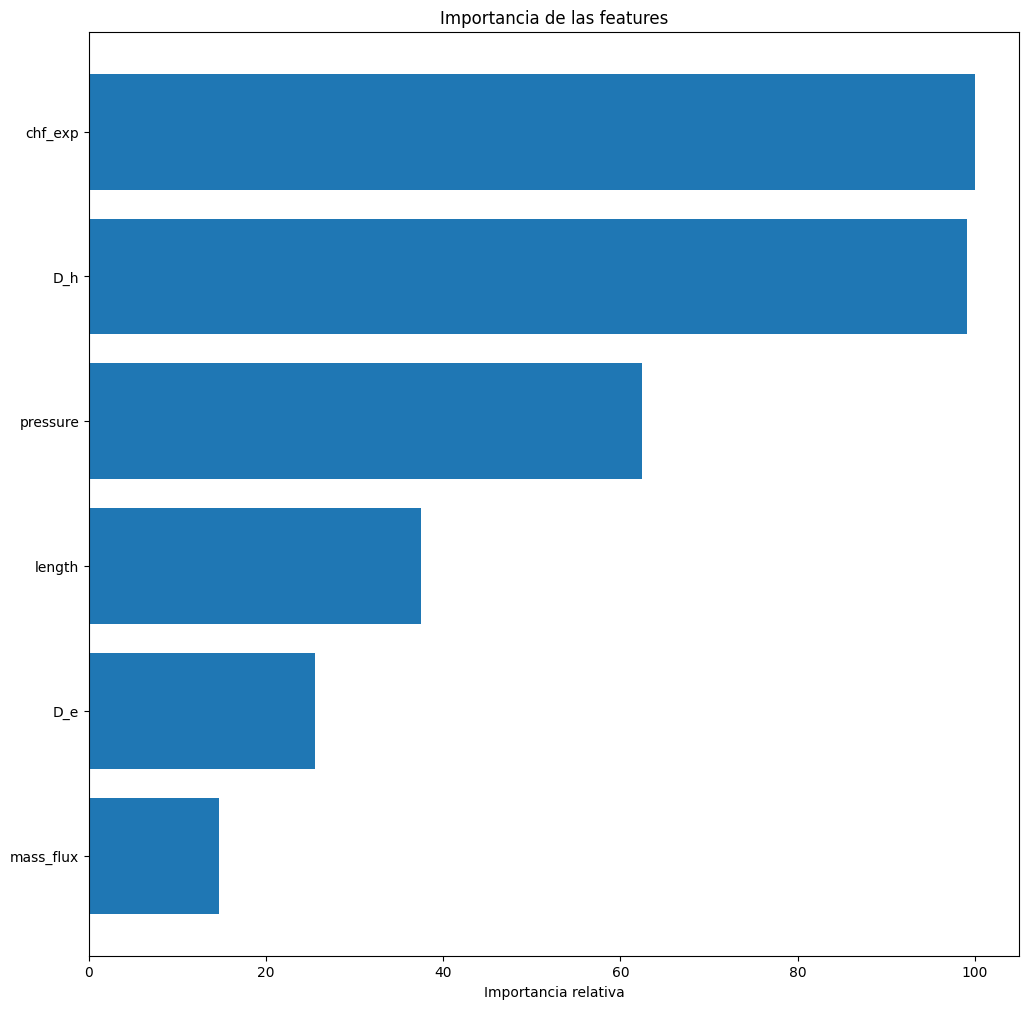

In [21]:
# Extraemos la feature importance del best model
feature_importance = best_model.named_steps['estimator'].feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
feature_names = X.columns
feature_names = feature_names[sorted_idx]
feature_importance = feature_importance[sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + .5

# Representamos la importancia de las features
plt.figure(figsize=(12, 12))
plt.barh(pos, feature_importance, align='center')
plt.yticks(pos, feature_names)
plt.xlabel('Importancia relativa')
plt.title('Importancia de las features')
plt.show()


### Extraemos todas las métricas para este modelo en formato csv

In [23]:
# Extraemos las métricas de evaluación para todos los modelos del pipeline en formato dataframe y lo pasamos a csv
cv_results = pd.DataFrame(gridsearch1.cv_results_)


In [34]:
# Extraemos todas las métricas de evaluación del modelo en formato dataframe y luego lo pasamos a csv
metricas_sexto_modelo_red_neuronal = pd.DataFrame({'MSE' : [mse], 'RMSE' : [rmse], 'MAE' : [mae], 'R2' : [r2]})


### Guardamos el mejor modelo en un archivo .pickle
#### (Pendiente de hacer función)

In [32]:
nombre_archivo = '../output/models/sexto_modelo_red_neuronal.pickle'
modelo = best_model1
import pickle
try:
    with open(nombre_archivo, 'wb') as archivo:
        pickle.dump(modelo, archivo)
    print(f"El modelo se ha guardado exitosamente en {nombre_archivo}.")
except IOError:
    print("Error: No se pudo guardar el modelo. Permiso denegado.")

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
.........7
.........8
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-05-25 11:22:59         2235
metadata.json                                  2023-05-25 11:22:59           64
variables.h5                                   2023-05-25 11:22:59       441792
El modelo se ha guardado exitosamente en ../output/models/sexto_modelo_red_neuronal.pickle.


In [33]:
def csv_datos(nombre_archivo, data):
    '''Guarda el dataframe data en un archivo csv con nombre nombre_archivo
    en la carpeta data/processed'''
    ruta_archivo = '../output/reports'
    data.to_csv(ruta_archivo + "/" + nombre_archivo, sep='\t', index=False)

In [35]:
# Guardamos los datos con las métricas en un csv
ruta_archivo = './output/reports/'
csv_datos("metricas_sexto_modelo_red_neuronal.csv", metricas_sexto_modelo_red_neuronal)